<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/01.%20week%201/Task/Machine%20Learning%20Week%201_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.8 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mglearn
from sklearn.preprocessing import LabelEncoder

In [10]:
url = "https://raw.githubusercontent.com/KrituneX/Machine-Learning/refs/heads/main/01.%20week%201/dataset/Automobile.csv"
df = pd.read_csv(url)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [11]:
df.isnull().sum()
total_missing = df.isnull().sum().sum()
print("Total missing values:", total_missing)

Total missing values: 59


In [12]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [13]:
df_check = df.isnull().sum()
print(df_check)
total_missing = df.isnull().sum().sum()
print("Total missing values:", total_missing)

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64
Total missing values: 0


In [15]:
X = df.drop(columns=["symboling"])
y = df["symboling"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

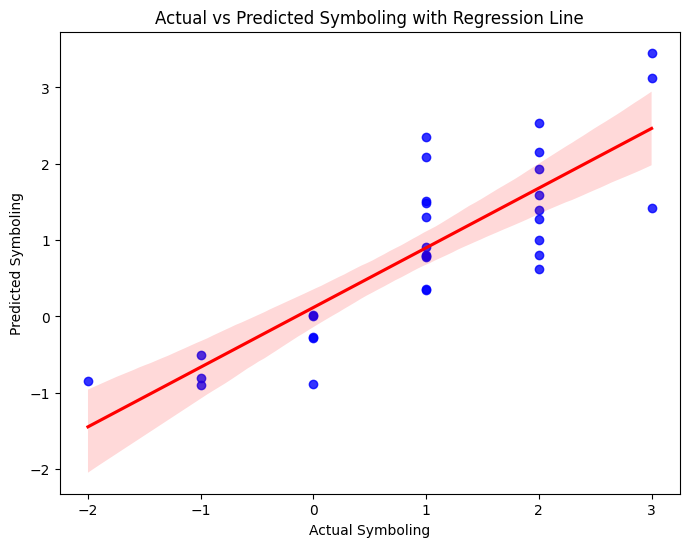

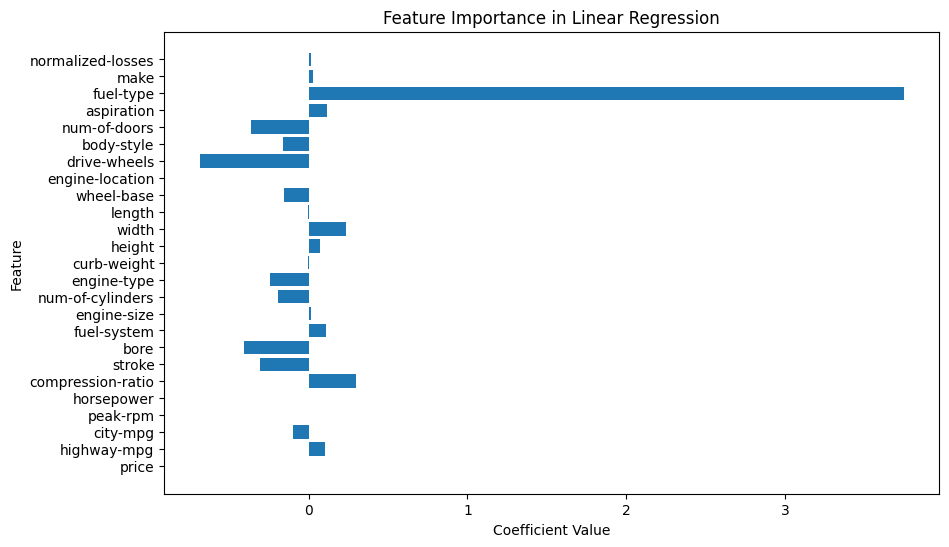

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling with Regression Line")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.coef_)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()

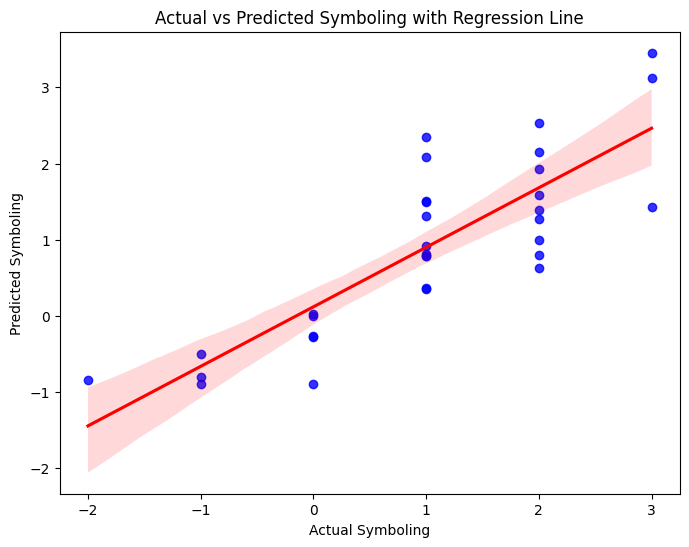

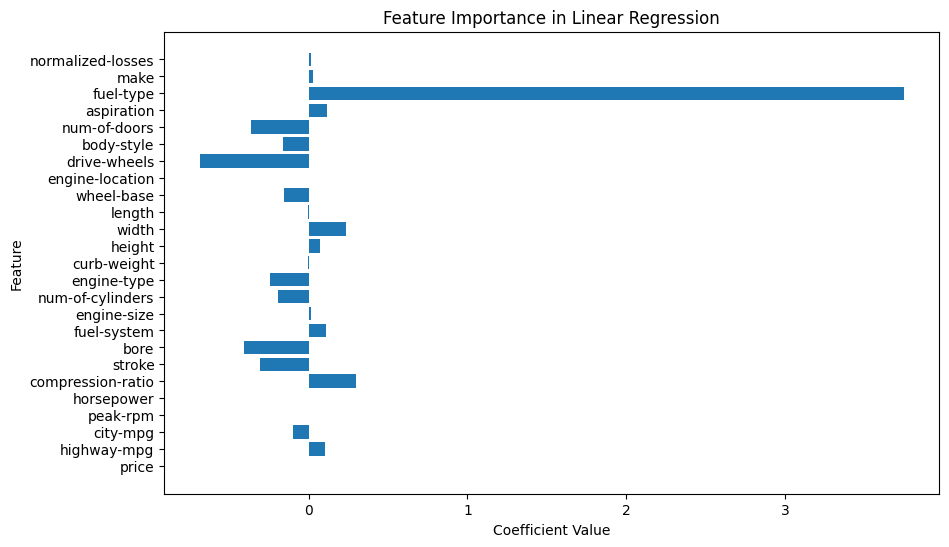

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling with Regression Line")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.coef_)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [20]:
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error (MSE) = (1/n) * Σ(aktual - prediksi)^2
rmse = np.sqrt(mse) # Root Mean Squared Error (RMSE) = √MSE
r2 = r2_score(y_test, y_pred) # R-squared (R²) = 1 - (Σ(aktual - prediksi)^2 / Σ(aktual - rata-rata(aktual))^2)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R²):", r2)

Mean Squared Error (MSE): 0.4858863257584891
Root Mean Squared Error (RMSE): 0.6970554682078673
R-squared Score (R²): 0.6689636742670041


In [21]:
from IPython.display import display, Math

# Menampilkan rumus dan penjelasan dalam format LaTeX
display(Math(r"\textbf{Mean Squared Error (MSE)}"))
display(Math(r"MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2"))
display(Math(r"\text{MSE mengukur rata-rata kesalahan kuadrat antara nilai aktual } (y_i) \text{ dan prediksi } (\hat{y}_i)."))

display(Math(r"\textbf{Root Mean Squared Error (RMSE)}"))
display(Math(r"RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}"))
display(Math(r"\text{RMSE adalah akar kuadrat dari MSE, sehingga memiliki satuan yang sama dengan target.}"))

display(Math(r"\textbf{R-Squared (R^2)}"))
display(Math(r"R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}"))
display(Math(r"\text{R^2 menunjukkan seberapa baik model menjelaskan variasi data, dengan nilai mendekati 1 lebih baik.}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>